<h2 align='left' style="color: darkblue;">Image matching</h2>

Working on a popular Fashion MNIST dataset for this project. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. 

In order to load the dataset we need to have `tensorflow V2` on your computer. Use the following code to install the package

In [1]:
#!pip install --upgrade tensorflow

In [1]:
import tensorflow as tf
tf.__version__

'2.10.0'

Now, it's time to load the dataset

In [2]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

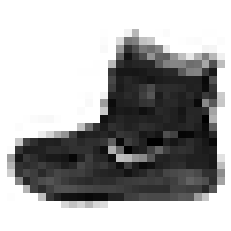

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[0]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [6]:
y_train[0]

9

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [7]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[0]])

Ankle boot


<ui>

### The goal of this ptoject is to train different supervised models with the given dataset and to select the best model for identifying and classifying real world photographs

<ul>
    <b>before starting working on the project, we have to evaluate the problem first.</b>
    </ul>
    <ul><li>The training dataset is consisting of 60000 photographs belonging to ten different type of fashion garments and accessories.</li>
    <li>We are also given a test dataset which contains 10000 photographs of similar categories.</li>
    <li>Both the train and test data is devided in X-set and y-set.</li>
    <li>The X datasets contains photos, each photo is 28 pixel in height and 28 pixel in width</li>
    <li>The y datasets have the labels assigned to each category, it ranges between 0 and 9</li>
     
</ul>



<b>Our first step is to evaluate the datasets</b>

<li>Lets check the qunque values inside y train and y test datasets</li>

In [8]:
import numpy as np
np.unique(y_train, return_counts= True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [9]:
np.unique(y_test, return_counts= True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

<ul><li>By looking at the unique values, which represent the different classes inside the datasets, we can observe that both the datasets are devided in 10 classes. we can also see that the classes are equally distributed inside both datasets. Each class have 6000 observations in y_train dataset, and 1000 observations in y_test dataset. </li>

<li>Now we shall check the unique values in X_train and X_test datasets</li>

In [10]:
np.unique(X_train, return_counts= True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [11]:
np.unique(X_test)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

<ul><li>We can observe that the values in X datasets are distributed between 0 - 255 range. which gives us the sence that the values correspond to pixel values and we can also see that the majority of pixels are black which have zero as value  </li>

<ul><li>Now, as we gained some idea on the distribution of values inside the datasets, we can start building predictive models. We can clearly see that the task of the predictive model is to assign the result to a specific class. Thus it becomes clear that we have to build a classification model. We shall train the dataset on classification algorithm based models and evaluate them on their performance. We shall use the following models to find answer for the classification problem:</li>
        <ul><li> Gaussian Naive Bays' model</li>
        <li> Decission Tree model</li>
        <li> Logistic Regression model</li>
        <li> K- Nearest Neighborhood model</li>
        <li> Random Forest Classifier model</li>
        <li> Support Vector Machine(SVM) Classifier model</li>
        <li> Neural Network model</li>
            
    


<li>At first, we shall import the required Python modules and libraries</li>

In [12]:
#import all libraries and modules 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score,f1_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report

In [13]:
#disabling the warning messages
import warnings
warnings.filterwarnings('ignore')

<ul><li>each observation in the X_train and X_test datasets are in 2d array format, to work with the data, we have to flatten the 2 dimensional arrays in 1 dimensional arrays </li>

In [14]:
#get the dimensions of X-train and X-test datasets
d1,d2,d3 = X_train.shape# d1 is the number of rows in dataset, d2 & d3 are dimensions of 2d array in training dataset
l1,l2,l3 = X_test.shape# l1 is the number of rows in dataset, l2 & l3 are dimensions of 2d array in test dataset

In [15]:
#transform the X-train and X-test datasets from 2 dimensional to 1 dimensional array
X_train = X_train.reshape(d1, d2*d3)# multiplying the dimensions of 2d array to convert in 1d array
X_test = X_test.reshape(l1, l2*l3)# multiplying the dimensions of 2d array to convert in 1d array

In [16]:
#shape of X-train dataset after transformation
X_train.shape

(60000, 784)

In [17]:
#shape of X-test dataset after transformation
X_test.shape

(10000, 784)

<ul><li>We shall apply the stratified-K-fold cross validation method to uniformly distribute the datapoints accross the dataset and cross validate in different folds</li>

In [18]:
#defining a 10 fold stratified cross validation
cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

<ul>

<ul>Model 1: <b>Gaussian Naive Bays' Classifier</b>    
    <ul><li>Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.</li>
        <li>First model to train with the dataset is Gaussian Naive Bays' Classifier model. At first we are going to evaluate the model by cross validating it accross the training dataset and calculating the 'Accuracy', 'Precision', 'Recall', 'F1' and 'ROC_AUC score' from the cross validation.</li>
        <li>After getting the scores, we shall fit the model with training dataset and get predictions for both training and test data. thereafter we shall calculate the 'in sample' and 'out of sample' accuracy of this model.</li>

In [277]:
GNB_model = GaussianNB()#declare the model
#get the model scores by cross validating on training dataset
GNB_accuracy = cross_validate(GNB_model,  X_train, y_train, scoring='accuracy', cv=cv)#get accuracy score 
GNB_precision = cross_validate(GNB_model,  X_train, y_train, scoring='precision_macro', cv=cv)#get precision score
GNB_recall = cross_validate(GNB_model,  X_train, y_train, scoring='recall_macro', cv=cv)#get recall score
GNB_f1_score = cross_validate(GNB_model,  X_train, y_train, scoring='f1_weighted', cv=cv)#get F1 score
GNB_roc_auc_score = cross_validate(GNB_model,  X_train, y_train, scoring='roc_auc_ovo_weighted', cv=cv)#get roc_auc score
#print the scores
print(f"GNB mean accuracy score= {np.mean(GNB_accuracy['test_score']):.4f}" )
print(f"GNB mean precision score= {np.mean(GNB_precision['test_score']):.4f}" )
print(f"GNB mean recall score= {np.mean(GNB_recall['test_score']):.4f}" )
print(f"GNB mean f1 score= {np.mean(GNB_f1_score['test_score']):.4f}" )
print(f"GNB mean ROC AUC score= {np.mean(GNB_roc_auc_score['test_score']):.4f}" )
GNB_model.fit(X_train,y_train) # fit the GNB model with training data
GNB_y_train_hat  = GNB_model.predict(X_train)#predict values for the same training data (in sample)
GNB_y_test_hat  = GNB_model.predict(X_test)#predict values for test data (out of sample)
GNB_in_sample_acc = accuracy_score(y_train,GNB_y_train_hat, normalize = True)  #predict in sample accuracy score
GNB_out_of_sample_acc = accuracy_score(y_test,GNB_y_test_hat, normalize = True) #predict out of sample accuracy score
print(f"Naive Bays' In-sample Accuracy: {GNB_in_sample_acc:.4f}")#print in sample accuracy
print(f"Naive Bays' Out-of-sample Accuracy: {GNB_out_of_sample_acc:.4f}")#print out of sample accuracy

GNB mean accuracy score= 0.5877
GNB mean precision score= 0.6397
GNB mean recall score= 0.5877
GNB mean f1 score= 0.5579
GNB mean ROC AUC score= 0.8948
Naive Bays' In-sample Accuracy: 0.5878
Naive Bays' Out-of-sample Accuracy: 0.5856


<li>Classification report for GNB model</li>

In [199]:
#get the classification report for GNB model
GNB_y_test_hat  = GNB_model.predict(X_test)
print("Gaussian Naive Bays' Classification report : ")
print(classification_report(y_test,GNB_y_test_hat))

Gaussian Naive Bays' Classification report : 
              precision    recall  f1-score   support

           0       0.81      0.59      0.68      1000
           1       0.64      0.94      0.76      1000
           2       0.59      0.32      0.42      1000
           3       0.44      0.55      0.49      1000
           4       0.38      0.78      0.51      1000
           5       0.93      0.28      0.43      1000
           6       0.32      0.04      0.07      1000
           7       0.51      0.99      0.67      1000
           8       0.83      0.71      0.77      1000
           9       0.91      0.67      0.77      1000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.56     10000
weighted avg       0.64      0.59      0.56     10000



<ul><li>It can be observed that the Gaussian Naive Bays' model have a mean accuracy of 0.59, mean precision score of 0.64,and mean recall of 0.59.The model is also not consistant in both scores,as we can observe that it have precision scores below 0.4 in two classes, at 0.4 to 0.5 level in two calsses and at 0.6 level in one class. which is not preferable for a prediction model. </li>

In [200]:
#save the GNB model for future use by pickling it
pickle.dump(GNB_model, open('GNB_model.pkl','wb'))

<ul>

<ul>Model 2: <b>Decission Tree </b>
    <ul><li>Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.</li>
        <li>We shall build the decission tree model by using grid search cross validation, thereby we can choose the best parameter for the madel by feeding the grid search method with different parameter values and getting the best model based on accuracy score </li>

In [20]:
DT_model = DecisionTreeClassifier()# define the model
param_grid = {'max_depth': [i for i in range(10)]}#define the parameters for gridsearch,here max depth of tree

grid = GridSearchCV(DT_model, param_grid, cv = cv,return_train_score=True, scoring='accuracy')#define the gridsearch 
grid.fit(X_train, y_train)# fit training data with gridsearch method
print("Decission Tree Best Parameter:) {}".format(grid.best_params_))# get the best parameters from gridsearch
print(grid.best_params_)
print("Decission Tree Best Cross Vlidation accuracy score: {}".format(grid.best_score_))# best score from gridsearch

DT_bestModel = grid.best_estimator_#best model from gridsearch 
DT_y_train_hat  = DT_bestModel.predict(X_train) # predict for train data(in sample data)
DT_y_test_hat  = DT_bestModel.predict(X_test)#predict for test data(out of sample data)
DT_in_sample_acc = accuracy_score(y_train,DT_y_train_hat, normalize = True) #in sample accuracy score
DT_out_of_sample_acc = accuracy_score(y_test,DT_y_test_hat, normalize = True) #out of sample accuracy score
print(f"Decission Tree In-sample Accuracy: {DT_in_sample_acc:.4f}")# print in sample accuracy score
print(f"Decission Tree Out-of-sample Accuracy: {DT_out_of_sample_acc:.4f}")# print out of sample accuracy score


Decission Tree Best Parameter:) {'max_depth': 9}
{'max_depth': 9}
Decission Tree Best Cross Vlidation accuracy score: 0.8035166666666667
Decission Tree In-sample Accuracy: 0.8321
Decission Tree Out-of-sample Accuracy: 0.7972


<ul><li>AS the max depth parameter is at the end of specified parameter values, we shall run the gridsearch again to find if there is any higher value for max depth which gives better accuracy </li>

In [21]:
DT_model = DecisionTreeClassifier()#define the model
param_grid = {'max_depth': [i for i in range(9,15)]}#define the parameters for gridsearch,here max depth of tree

grid = GridSearchCV(DT_model, param_grid, cv = cv,return_train_score=True, scoring='accuracy')#define the gridsearch 
grid.fit(X_train, y_train)# fit training data with gridsearch method
print(f"Decission Tree Best Parameter: {grid.best_params_}")# get the best parameters from gridsearch
print(f"Decission Tree Best Cross Vlidation accuracy score: {grid.best_score_:.4f}")# best score from gridsearch

DT_bestModel_1 = grid.best_estimator_#best model from gridsearch 
DT_y_train_hat  = DT_bestModel_1.predict(X_train)# predict for train data(in sample data)
DT_y_test_hat  = DT_bestModel_1.predict(X_test)#predict for test data(out of sample data)
DT_in_sample_acc = accuracy_score(y_train,DT_y_train_hat, normalize = True) #in sample accuracy score
DT_out_of_sample_acc = accuracy_score(y_test,DT_y_test_hat, normalize = True)#out of sample accuracy score
print(f"Decission Tree In-sample Accuracy: {DT_in_sample_acc:.4f}")# print the in sample accuracy score
print(f"Decission Tree Out-of-sample Accuracy: {DT_out_of_sample_acc:.4f}")#print out of sample accuracy score

Decission Tree Best Parameter: {'max_depth': 13}
Decission Tree Best Cross Vlidation accuracy score: 0.8195
Decission Tree In-sample Accuracy: 0.9071
Decission Tree Out-of-sample Accuracy: 0.8098


<ul><li>The best decission tree model have a maximum depth of 13 and it gives an out of sample accuracy score of 0.81</li>
    <li>Now we shall cross validate the model scores by 10 fold stratified cross validation and calculate the 'accuracy,'precision','recall','F1' and 'AUC-ROC' scores</li>

In [22]:
DT_accuracy = cross_validate(DT_bestModel_1,  X_train, y_train, scoring='accuracy', cv=cv)#calculate the accuracy score
DT_precision = cross_validate(DT_bestModel_1,  X_train, y_train, scoring='precision_macro', cv=cv)#calculate precision score
DT_recall = cross_validate(DT_bestModel_1,  X_train, y_train, scoring='recall_macro', cv=cv)#calculate recall score
DT_f1_score = cross_validate(DT_bestModel_1,  X_train, y_train, scoring='f1_weighted', cv=cv)#calculate F1 score
DT_roc_auc_score = cross_validate(DT_bestModel_1,  X_train, y_train, scoring='roc_auc_ovo_weighted', cv=cv)# ROC_AUC score
#print the scores
print(f"Decission Tree model mean accuracy score= {np.mean(DT_accuracy['test_score']):.4f}" )#print accuracy score
print(f"Decission Tree model mean precision score= {np.mean(DT_precision['test_score']):.4f}" )#print precision score
print(f"Decission Tree model mean recall score= {np.mean(DT_recall['test_score']):.4f}" )#print recall score
print(f"Decission Tree model mean f1 score= {np.mean(DT_f1_score['test_score']):.4f}" )#print F1 score
print(f"Decission Tree model mean ROC AUC score= {np.mean(DT_roc_auc_score['test_score']):.4f}" )#print roc-auc score

Decission Tree model mean accuracy score= 0.8196
Decission Tree model mean precision score= 0.8198
Decission Tree model mean recall score= 0.8190
Decission Tree model mean f1 score= 0.8195
Decission Tree model mean ROC AUC score= 0.9431


In [70]:
#get the classification report using the best model
DT_y_test_hat  = DT_bestModel_1.predict(X_test)# predict the test dataset
print("Decission Tree model Classification report : ") #print classification report
print(classification_report(y_test,DT_y_test_hat))#calssification report

Decission Tree model Classification report : 
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1000
           1       0.96      0.94      0.95      1000
           2       0.66      0.69      0.68      1000
           3       0.83      0.80      0.82      1000
           4       0.66      0.72      0.69      1000
           5       0.93      0.88      0.90      1000
           6       0.58      0.53      0.56      1000
           7       0.87      0.91      0.89      1000
           8       0.92      0.92      0.92      1000
           9       0.92      0.92      0.92      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



<ul><li>We can oberve that the average accuracy, precision and recall scores are at 0.81, but we also see that the model scores below 0.8  in four classes - for class 0, class 2, class 4 and class 6. which makes this model a little less reliable as a prediction model.</li>

In [23]:
DT_bestModel_1.fit(X_train,y_train)# fit the model with training data

DecisionTreeClassifier(max_depth=13)

In [24]:
pickle.dump(DT_bestModel_1, open('DT_model.pkl','wb'))#save the DT model for future use by pickling it

<ul><li>We can visualize the actual tree model by using graphviz </li>

In [699]:
%matplotlib inline
from sklearn import tree#import tree model
import graphviz #import graphviz library
data=tree.export_graphviz(DT_model)  
graph = graphviz.Source(data)  
graph #visualize the tree model

<ul>

<ul>Model 3: <b>Logistic Regression model</b> (Multinomial)
    <ul><li>Multinomial logistic regression is a classification method that generalizes logistic regression to multiclass problems, i.e. with more than two possible discrete outcomes.[1] That is, it is a model that is used to predict the probabilities of the different possible outcomes of a categorically distributed dependent variable, given a set of independent variables (which may be real-valued, binary-valued, categorical-valued, etc.).</li>
        <li>We shall apply the Logistic regression model to solve our problem.</li>
        <li>At first we shall define the multinomial logistic regression model and calculate the model accuracy, recall, precision, F1 score and ROC_AUC score by cross validating it with training data over ten folds</li>

In [202]:
LR_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')#define the multinomial model
LR_accuracy = cross_validate(LR_model,  X_train, y_train, scoring='accuracy', cv=cv)#calculate accuracy of model
LR_precision = cross_validate(LR_model,  X_train, y_train, scoring='precision_macro', cv=cv)#calculate precision of model
LR_recall = cross_validate(LR_model,  X_train, y_train, scoring='recall_macro', cv=cv)#calculate recall score of model
LR_f1_score = cross_validate(LR_model,  X_train, y_train, scoring='f1_weighted', cv=cv)#calculate F1 score of model
LR_roc_auc_score = cross_validate(LR_model,  X_train, y_train, scoring='roc_auc_ovo_weighted', cv=cv)#roc-auc score of model
#print the scores
print(f"Logistic Regression model mean accuracy score= {np.mean(LR_accuracy['test_score']):.4f}" )#print accuracy
print(f"Logistic Regression model mean precision score= {np.mean(LR_precision['test_score']):.4f}" )#print precision score
print(f"Logistic Regression model mean recall score= {np.mean(LR_recall['test_score']):.4f}" )#print recall score
print(f"Logistic Regression model mean f1 score= {np.mean(LR_f1_score['test_score']):.4f}" )#print F1 score
print(f"Logistic Regression model mean ROC AUC score= {np.mean(LR_roc_auc_score['test_score']):.4f}" )#print roc-auc score

LR_model.fit(X_train,y_train)#fit the model with training data

LR_y_train_hat  = LR_model.predict(X_train)#do prediction with train data(in sample data)
LR_y_test_hat  = LR_model.predict(X_test)#do prediction with test data (out of sample data)
LR_in_sample_acc = accuracy_score(y_train,LR_y_train_hat, normalize = True) #calculate accuracy for in sample data
LR_out_of_sample_acc = accuracy_score(y_test,LR_y_test_hat, normalize = True)#calculate accuracy for out of sample data 
print(f"Logistic Regression model In-sample Accuracy: {LR_in_sample_acc:.4f}")#print in sample accuracy
print(f"Logistic Regression model Out-of-sample Accuracy: {LR_out_of_sample_acc:.4f}")#print out of sample accuracy
 

Logistic Regression model mean accuracy score= 0.8525
Logistic Regression model mean precision score= 0.8516
Logistic Regression model mean recall score= 0.8525
Logistic Regression model mean f1 score= 0.8514
Logistic Regression model mean ROC AUC score= 0.9846
Logistic Regression model In-sample Accuracy: 0.8632
Logistic Regression model Out-of-sample Accuracy: 0.8412


In [203]:
LR_y_test_hat  = LR_model.predict(X_test)#predict with test data
print("Logistic Regression model Classification report : ")
print(classification_report(y_test,LR_y_test_hat))#print classification report

Logistic Regression model Classification report : 
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.97      0.96      0.96      1000
           2       0.73      0.74      0.73      1000
           3       0.84      0.86      0.85      1000
           4       0.71      0.78      0.74      1000
           5       0.94      0.89      0.92      1000
           6       0.64      0.55      0.59      1000
           7       0.90      0.93      0.92      1000
           8       0.93      0.95      0.94      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



<ul><li>This logistic regression model performance is slightly better than the earlier models. The mean accuracy score is 0.84, the average precision and recall scores are also at 0.84. And except for classes two, four, and six, the scores are above 0.8. It is also above 0.9 in five of the cases. This model can be used as prediction model</li>

In [204]:
pickle.dump(LR_model, open('LR_model.pkl','wb'))#save the LR model for future use by pickling it

<ul>

<ul>Model 4: <b>K-Nearest-Neighbors model</b>
    <ul><li>The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data.</li>
        <li>We shall use gridsearch method with ten fold cross validation to find out the best parameter for the KNN model. the parameter for this model is number of neighbours. We shall search the optimum number of neighbours to find the model which gives us highest accuracy score. </li>

In [26]:
KNN_model = KNeighborsClassifier()#define the model

param_grid = {'n_neighbors': [i for i in range(3,15,2)]}#define the gridsearch to find best parameter
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X_train, y_train)# fit the grid with training data

print("Best Parameter: {}".format(grid.best_params_))#best parameter for KNN modelfrom gridsearch
print("Best Cross Vlidation Score: {}".format(grid.best_score_))#best accuracy score of KNN model from gridsearch

Best Parameter: {'n_neighbors': 5}
Best Cross Vlidation Score: 0.8548833333333332


<li>After getting the best parameters from gridsearch, we shall cross validate the model by ten folds on the training dataset to calculate the model scores</li>

In [27]:
KNN_best_model=grid.best_estimator_ #assign the model as the best model from gridsearch
KNN_accuracy = cross_validate(KNN_best_model,  X_train,y_train, scoring='accuracy', cv=cv)#accuracy score
KNN_precision = cross_validate(KNN_best_model,  X_train, y_train, scoring='precision_macro', cv=cv)#precision score
KNN_recall = cross_validate(KNN_best_model,  X_train, y_train, scoring='recall_macro', cv=cv)#recall score
KNN_f1_score = cross_validate(KNN_best_model,  X_train, y_train, scoring='f1_weighted', cv=cv)#F1 score
KNN_roc_auc_score = cross_validate(KNN_best_model,  X_train, y_train, scoring='roc_auc_ovo_weighted', cv=cv)#ROC-AUC score

print(f"KNN model mean accuracy score= {np.mean(KNN_accuracy['test_score']):.4f}" )#print accuracy score
print(f"KNN model mean precision score= {np.mean(KNN_precision['test_score']):.4f}" )#print precision score
print(f"KNN model mean recall score= {np.mean(KNN_recall['test_score']):.4f}" )#print recall score
print(f"KNN model mean f1 score= {np.mean(KNN_f1_score['test_score']):.4f}" )#print F1 score
print(f"KNN model mean ROC AUC score= {np.mean(KNN_roc_auc_score['test_score']):.4f}" )#print ROC-AUC score

KNN model mean accuracy score= 0.8549
KNN model mean precision score= 0.8577
KNN model mean recall score= 0.8549
KNN model mean f1 score= 0.8541
KNN model mean ROC AUC score= 0.9697


<li>Now we shall find the KNN model accuracy score with test dataset</li>

In [30]:
KNN_best_model.fit(X_train,y_train)#fit the model with training data

KNN_y_train_hat  = KNN_best_model.predict(X_train)#do prediction with train data(in sample data)
KNN_y_test_hat  = KNN_best_model.predict(X_test)#do prediction with test data(out of sample data)
KNN_in_sample_acc = accuracy_score(y_train,KNN_y_train_hat, normalize = True) #calculate in sample accuracy score
KNN_out_of_sample_acc = accuracy_score(y_test,KNN_y_test_hat, normalize = True)#calculate out of sample accuracy score 
print(f"KNN model In-sample Accuracy: {KNN_in_sample_acc:.4f}")#print in sample accuracy
print(f"KNN model Out-of-sample Accuracy: {KNN_out_of_sample_acc:.4f}")#print out of sample accuracy

KNN model In-sample Accuracy: 0.8998
KNN model Out-of-sample Accuracy: 0.8554


<li>We shall also visualize the classification report to see the model performance for each class</li>

In [72]:
KNN_y_test_hat  = KNN_best_model.predict(X_test)
print("K Nearest Neighbor model Classification report : ")
print(classification_report(y_test,KNN_y_test_hat))#print classification report for KNN model

K Nearest Neighbor model Classification report : 
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
           7       0.88      0.96      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



<ul><li>This KNN model performance is improved from the earlier models. The mean accuracy score is 0.86, the average precision and recall scores are also at 0.86. Except for classes zero,two, four, and six, the scores are above 0.8. It also above a score of 0.9 or above in five of the classes. Thus we can infer that this model can also be used as a prediction model</li>

In [31]:
pickle.dump(KNN_best_model, open('KNN_model.pkl','wb'))#save the KNN model for future use by pickling it

<ul>


<ul>Model 5: <b>Random Forest Classifier model</b>
    <ul><li>A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.</li>
        <li>We shall perform the grid search operation with stratified cross validation to find the best parameters for random forest classifier model.The parameters that we shall look for in the gridsearch method are number of estimators, or number of trees, and maximum depth for each tree</li>
        <li>Before we start the random forest classifier model, we shall normalize the train and test dataset </li>

In [53]:
X_train = (X_train/255)#normalize train dataset

In [55]:
X_test = (X_test/255)#normalize test dataset

In [21]:
rf_model = RandomForestClassifier()#define the random forest model
param_grid = {'n_estimators': [200,500,1000,1200],
              'max_depth': [10,20,40,80]} #define the parameters to search within
cv = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)#define cross validation with three folds
rf_grid = GridSearchCV(rf_model, param_grid, cv = cv, scoring='accuracy')#define grid search method 

rf_grid.fit(X_train, y_train)#fit the model in grid
rf_bestModel = rf_grid.best_estimator_ #best model from the grid search
print(f"Randon Forest Best Parameter: {rf_grid.best_params_}")#best parameters from gridsearch method
print(f"Random Forest Best Cross Vlidation accuracy score: {rf_grid.best_score_:.4f}")#best score from gridsearch


Randon Forest Best Parameter: {'max_depth': 40, 'n_estimators': 1000}
Random Forest Best Cross Vlidation accuracy score: 0.8827


<ul><li>We can observe that the best model have parameters which lays at end of the range of given parameters, we shall conduct the gridsearch again with parameters spanning beyond the last best parameter</li>

In [19]:
rf_model = RandomForestClassifier()
param_grid = {'n_estimators': [1000,1200],
              'max_depth': [40,50]}#define the range of parameters to select from
cv = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
rf_grid = GridSearchCV(rf_model, param_grid, cv = cv, scoring='accuracy')#define the grid search method

rf_grid.fit(X_train, y_train)#fit training data to grid
rf_bestModel_1 = rf_grid.best_estimator_#best model from the grid
print(f"Randon Forest Best Parameter: {rf_grid.best_params_}")#best parameter from the grid
print(f"Random Forest Best Cross Vlidation accuracy score: {rf_grid.best_score_:.4f}")#best accuracy score from grid

Randon Forest Best Parameter: {'max_depth': 50, 'n_estimators': 1000}
Random Forest Best Cross Vlidation accuracy score: 0.8822


In [20]:
rf_bestModel_1.fit(X_train,y_train)#fit the best model with training dataset

RandomForestClassifier(max_depth=50, n_estimators=1000)

In [23]:
RF_y_train_hat  = rf_bestModel_1.predict(X_train)#do prediction with train data(in sample data)
RF_y_test_hat  = rf_bestModel_1.predict(X_test)#do prediction with test data(out of sample data)
RF_in_sample_acc = accuracy_score(y_train,RF_y_train_hat, normalize = True)# calculate in sample accuracy 
RF_out_of_sample_acc = accuracy_score(y_test,RF_y_test_hat, normalize = True)#calculate out of sample accuracy

print(f"Random Forest model In-sample Accuracy: {RF_in_sample_acc:.4f}")#print in sample accuracy score
print(f"Random Forest model Out-of-sample Accuracy: {RF_out_of_sample_acc:.4f}")#print out of sample accuracy score


Random Forest model In-sample Accuracy: 1.0000
Random Forest model Out-of-sample Accuracy: 0.8781


<ul><li>We can see the difference between in sample and out of sample accuracy of random forest model. this proves that the model is highly overfitted.</li>
    <li>We shall perform another gridsearch to reduce the overfitting problem and to get a simpler model</li>

In [18]:
rf_model = RandomForestClassifier()
param_grid = {'n_estimators': [20,50,100],
              'max_depth': [10,20,30]}#define the range of parameters to select from
cv = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
rf_grid = GridSearchCV(rf_model, param_grid, cv = cv, scoring='accuracy')#define the grid search method

rf_grid.fit(X_train, y_train)#fit training data to grid
rf_bestModel_2 = rf_grid.best_estimator_#best model from the grid
print(f"Randon Forest Best Parameter: {rf_grid.best_params_}")#best parameter from the grid
print(f"Random Forest Best Cross Vlidation accuracy score: {rf_grid.best_score_:.4f}")#best accuracy score from grid

Randon Forest Best Parameter: {'max_depth': 30, 'n_estimators': 100}
Random Forest Best Cross Vlidation accuracy score: 0.8799


In [19]:
RF_y_train_hat  = rf_bestModel_2.predict(X_train)#do prediction with train data(in sample data)
RF_y_test_hat  = rf_bestModel_2.predict(X_test)#do prediction with test data(out of sample data)
RF_in_sample_acc2 = accuracy_score(y_train,RF_y_train_hat, normalize = True)# calculate in sample accuracy 
RF_out_of_sample_acc2 = accuracy_score(y_test,RF_y_test_hat, normalize = True)#calculate out of sample accuracy

print(f"Random Forest model In-sample Accuracy: {RF_in_sample_acc2:.4f}")#print in sample accuracy score
print(f"Random Forest model Out-of-sample Accuracy: {RF_out_of_sample_acc2:.4f}")#print out of sample accuracy score


Random Forest model In-sample Accuracy: 0.9999
Random Forest model Out-of-sample Accuracy: 0.8756


<ul><li>Now we shall also check the accuracy, precision, recall, F1 and ROC-AUC scores by cross validating the models accross training dataset</li>

In [22]:
rf_accuracy = cross_validate(rf_bestModel_2,  X_train, y_train, scoring='accuracy', cv=cv)#calculate accuracy score 
rf_precision = cross_validate(rf_bestModel_2,  X_train, y_train, scoring='precision_macro', cv=cv)#calculate precision score
rf_recall = cross_validate(rf_bestModel_2,  X_train,y_train, scoring='recall_macro', cv=cv)#calculate recall score
rf_f1_score = cross_validate(rf_bestModel_2,  X_train, y_train, scoring='f1_weighted', cv=cv)#calculate F1 score
rf_roc_auc_score = cross_validate(rf_bestModel_2,  X_train, y_train, scoring='roc_auc_ovo_weighted', cv=cv)#ROC-AUC score

print(f"Random Forest model mean accuracy score= {np.mean(rf_accuracy['test_score']):.4f}" )#print accuracy score
print(f"Random Forest model mean precision score= {np.mean(rf_precision['test_score']):.4f}" )#print precision score
print(f"Random Forest model mean recall score= {np.mean(rf_recall['test_score']):.4f}" )#print recall score
print(f"Random Forest model mean f1 score= {np.mean(rf_f1_score['test_score']):.4f}" )# print F1 score
print(f"Random Forest model mean ROC AUC score= {np.mean(rf_roc_auc_score['test_score']):.4f}" )#print ROC AUC score

Random Forest model mean accuracy score= 0.8802
Random Forest model mean precision score= 0.8788
Random Forest model mean recall score= 0.8809
Random Forest model mean f1 score= 0.8788
Random Forest model mean ROC AUC score= 0.9904


<li>We shall also visualize the classification report to see the model performance for each class</li>

In [21]:
# RF_model = pickle.load(open('RF_model.pkl','rb'))
RF_y_test_hat  = rf_bestModel_2.predict(X_test)
print("Random Forest model Classification report : ")#calculate the classification report
print(classification_report(y_test,RF_y_test_hat))#print classification report for random forest model

Random Forest model Classification report : 
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.81      0.78      1000
           3       0.88      0.91      0.89      1000
           4       0.77      0.81      0.79      1000
           5       0.97      0.96      0.96      1000
           6       0.72      0.59      0.65      1000
           7       0.93      0.94      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.87      0.88      0.87     10000
weighted avg       0.87      0.88      0.87     10000



<ul><li>This Random Forest model is good having a mean accuracy of 0.88, it  scores above the last four models. it have an average precision and recall score of 0.87 and 0.88 respectively, It have score of more than 0.9 for five classes, and higher than 0.8 in two classes.We can consider this model as good fit to be used as prediction model</li>

In [20]:
pickle.dump(rf_bestModel_2, open('RF_model.pkl','wb'))#save the Random forest model by pickling it

<ul>

<ul>Model 6 : <b>Support Vector Machine Classification model</b>
    <ul><li>SVC, or Support Vector Classifier, is a supervised machine learning algorithm typically used for classification tasks. SVC works by mapping data points to a high-dimensional space and then finding the optimal hyperplane that divides the data into two classes.</li>
    <li>As SVC takes a high volume of processing and our training dataset is large enough, we shall train the model by creating a smaller dataset by taking random samples from the main dataset </li>
    <li>We shall apply PCA to reduce the dimension of the derived dataset.</li>
    <li>We shall join the PCA and SVC algorithms through a pipeline to apply it on training and test datasets</li>

<ul><li> To generate a 10% random sample dataset from the training data, at first we will join the X train and y train datasets to form a combined dataset. Then  we shall take 10% random samples from that combined dataset and create a new dataset. Then we will seperate the X train and y train datasets again and use those to build our model</li>

In [31]:
fashion_mnist = keras.datasets.fashion_mnist#downloading the datasets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()#splitting in train and test sets
X_train = X_train.reshape(60000,784)# flattening the train dataset
X_test = X_test.reshape(10000,784)#flattening the test dataset
y1=y_train.reshape(60000,1)#reshaping the y train dataset to add with X train dataset
com= np.hstack((X_train,y1))#combining the X train and y train datasets to make a combined dataset
mask = np.random.choice([False, True], len(com), p=[0.9, 0.1]) #defining a filter to collect random 10% data
Frac = com[mask] #apply filter on the combined dataset
X_frac= Frac[:,:784]#collect the X train data from 10% filtered data 
y_frac=Frac[:,784:]#collect the y train data from 10% filtered data
y_frac=y_frac.flatten()#flatten the y train data

In [32]:
X_frac.shape
y_frac.shape
X_frac=(X_frac/255)# normalize the derived X train data


In [34]:
np.unique(y_frac, return_counts=True)# check for unique values in derived y train dataset

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([628, 567, 596, 595, 596, 639, 598, 605, 592, 594], dtype=int64))

<ul><li>We can observe that the derived dataset with 10% data have all the classes [from 0 to 9] in it and we can also find that the class variables have nearly similar counts. So, it can be said that they are evenly distributed in the dataset.</li>

<ul><li>We shall build the SVM model by building a pipeline by attaching PCA and SVM classifier.</li>
    <li> X train and X test datasets will be normalized before we perform PCA </li>

In [681]:
from sklearn.decomposition import PCA#import PCA module
from sklearn.pipeline import make_pipeline#import pipeline
from sklearn.svm import SVC# import SVC model
fashion_mnist = keras.datasets.fashion_mnist#import the SVC dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = (X_train.reshape(60000,784))/255 #normalize training data
X_test = (X_test.reshape(10000,784))/255 #normalize test data

<ul><li>Currently the dataset have 784 independent variables(each pixle is one variable). The goal of PCA is to reduce the number of dimensions(independent variables) while retaining the variability. To get an idea on optimum number of components we shall draw a graph showing number of components vs retained variability. This will help us to select the number of output components for the PCA </li>

Text(350, 0.7, 'Optimum number of components')

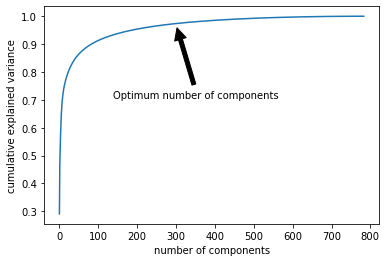

In [690]:
pca = PCA().fit(X_train)#fit the training dataset with PCA
plt.plot(np.cumsum(pca.explained_variance_ratio_))#calculate the cumulative variance vs component ratio and plot 
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.annotate('Optimum number of components', xy = (300,.97), xytext = (350,.7),#annotate the optimum point
            arrowprops = dict(facecolor='black', shrink = 0.05),
            horizontalalignment='center', verticalalignment='bottom')

<ul><li>By looking at the graph, we can visualize that for 300 components, we can achieve a retained variance level of around 96%-97%. We shall keep that number for our model </li>

<ul><li>We shall perform gridsearch with stratified cross validation of 3 folds to find out the best parameters for the SVC model </li>

In [683]:
pca = PCA(svd_solver='randomized', n_components=300,whiten=True, random_state=0)#define PCA process

svc = SVC(kernel='rbf',  class_weight='balanced')#define SVC classifier

SVC_model = make_pipeline(pca, svc)# Create pipleline model
cv = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
param_grid = {'svc__C': [.1,1,5,10,20],          #declare the C value to select from
              'svc__gamma': [.0005,.001,.01,.1]} #declare the gamma values to select from
grid = GridSearchCV(SVC_model, param_grid, cv = cv, scoring='accuracy')#define the grid search model

In [23]:
grid.fit(X_frac, y_frac)  #fit the triaining dataset with gridsearch
SVC_bestModel = grid.best_estimator_  #best model from the grid search
print(f"SVC Best Parameter:) {grid.best_params_}") # best parameters from the grid search
print(f"SVC Best Cross Vlidation accuracy score: {grid.best_score_:.4f}")#best model accuracy score with grid search

SVC Best Parameter:) {'svc__C': 5, 'svc__gamma': 0.001}
SVC Best Cross Vlidation accuracy score: 0.8308


In [77]:
SVC_bestModel.fit(X_train,y_train)# fit the best model with training dataset

Pipeline(steps=[('pca',
                 PCA(n_components=300, random_state=0, svd_solver='randomized',
                     whiten=True)),
                ('svc', SVC(C=5, class_weight='balanced', gamma=0.001))])

<ul><li>As we fitted the SVC model with training data, we can evaluate the model by performing cross validation and thereby calculating the accuracy, precision, recall, F1 and ROC-AUC scores. WE shall also calculate the in sample and out of sample accuracy scores </li>

In [27]:
SVC_y_train_hat  = SVC_bestModel.predict(X_frac) #predict with train data
SVC_y_test_hat  = SVC_bestModel.predict(X_test) #predict with test data
SVC_in_sample_acc = accuracy_score(y_frac,SVC_y_train_hat, normalize = True) #In sample accuracy score
SVC_out_of_sample_acc = accuracy_score(y_test,SVC_y_test_hat, normalize = True)#Out of sample accuracy score
SVC_accuracy = cross_validate(SVC_bestModel,  X_frac, y_frac, scoring='accuracy', cv=cv)# accuracy from cross validation
SVC_precision = cross_validate(SVC_bestModel,  X_frac, y_frac, scoring='precision_macro', cv=cv)# precision cross validation
SVC_recall = cross_validate(SVC_bestModel,  X_frac, y_frac, scoring='recall_macro', cv=cv)#recall from cross validation
SVC_f1_score = cross_validate(SVC_bestModel,  X_frac, y_frac, scoring='f1_weighted', cv=cv)#F1 score from cross validation
SVC_roc_auc_score = cross_validate(SVC_bestModel,  X_frac, y_frac, scoring='roc_auc_ovr_weighted', cv=cv)#ROC- AUC score

print(f"SVC model mean accuracy score= {np.mean(SVC_accuracy['test_score']):.4f}" )#print cross validation accuracy
print(f"SVC model mean precision score= {np.mean(SVC_precision['test_score']):.4f}" )#print cross validation precision
print(f"SVC model mean recall score= {np.mean(SVC_recall['test_score']):.4f}" )#print cross validation recall
print(f"SVC model mean f1 score= {np.mean(SVC_f1_score['test_score']):.4f}" )#print cross validation F1 score
print(f"SVC model mean ROC AUC score= {np.mean(SVC_roc_auc_score['test_score']):.4f}" )#print cross validation ROC-AUC score
print(f"SVC model In-sample Accuracy: {SVC_in_sample_acc:.4f}")#print in sample accuracy score
print(f"SVC model Out-of-sample Accuracy: {SVC_out_of_sample_acc:.4f}")#print out of sample accuracy score

SVC model mean accuracy score= 0.8308
SVC model mean precision score= 0.8312
SVC model mean recall score= 0.8318
SVC model mean f1 score= 0.8297
SVC model mean ROC AUC score= nan
SVC model In-sample Accuracy: 0.9650
SVC model Out-of-sample Accuracy: 0.8350


<ul><li>We shall calculate the classification report for SVC model with test dataset</li>

In [79]:
SVC_y_test_hat  = SVC_bestModel.predict(X_test) #predict with test data
print("SVC model Classification report : ")
print(classification_report(y_test,SVC_y_test_hat))#calculate classification report

SVC model Classification report : 
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.81      0.80      1000
           3       0.88      0.90      0.89      1000
           4       0.81      0.83      0.82      1000
           5       0.97      0.97      0.97      1000
           6       0.72      0.65      0.68      1000
           7       0.94      0.97      0.95      1000
           8       0.96      0.97      0.97      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



<ul><li>The scores of SVC model is highest among the last six models. The average accuracy of the SVC model is 0.89 and so is the precision and recall scores.In precision- it scores above 0.9 in five of the ten classes and the lowest score is 0.72 for class six. We can use this model as a prediction model</li>

In [78]:
pickle.dump(SVC_bestModel, open('SVC_model.pkl','wb'))#save the SVC model by pickling it for future use

<ul>

<ul>Model 7 : <b>Neural Network Model</b>
    <li>Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.
Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.</li>
    <li>We shall normalize the training dataset and perform grisearch with 3 fold stratified cross validation to obtain the best parameters </li>

In [40]:
X_train = (X_train/255)#normalize the training dataset

In [41]:
X_test = (X_test/255)#normalize the test dataset

In [42]:
cv = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)#declare 3 fold stratified cross validation model
NN_model = MLPClassifier(solver='adam',random_state=0, max_iter=500)#declare the neural network model
param_grid = {'hidden_layer_sizes':[[100,50,20],[200,100,50],[300,150,50],[350,150,100,50]]}#parameters for gridsearch
NN_grid = GridSearchCV(NN_model, param_grid, cv = cv, scoring='accuracy')#declare the gridsearch model

NN_grid.fit(X_train, y_train)#fit the train data with grid

print(f"Nural model Best Parameter: {NN_grid.best_params_}")#best parameter from the gridsearch
print(f"Nural model Best Cross Vlidation accuracy score: {NN_grid.best_score_:.4f}")#best accuracy score from grid search
NN_bestModel = NN_grid.best_estimator_#best model from the grid search

Nural model Best Parameter: {'hidden_layer_sizes': [350, 150, 100, 50]}
Nural model Best Cross Vlidation accuracy score: 0.8958


<ul><li>We can observe that the best model have parameters which lays at end of the range of given parameters, we shall conduct the gridsearch again with parameters spanning beyond the last best parameter</li>

In [43]:
cv = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
NN_model = MLPClassifier(solver='adam',random_state=0, max_iter=500)#declare neural net model
param_grid = {'hidden_layer_sizes':[[350,150,100,50],[400,200,100,50],[250,150,100,50,20]]}#define parameter values
NN_grid = GridSearchCV(NN_model, param_grid, cv = cv, scoring='accuracy')#define grid search model

NN_grid.fit(X_train, y_train)#fit training data to grid

print(f"Nural model Best Parameter: {NN_grid.best_params_}")#best parameters from gridsearch
print(f"Nural model Best Cross Vlidation accuracy score: {NN_grid.best_score_:.4f}")#best accuracy score from grid search
NN_bestModel = NN_grid.best_estimator_#best model from the grid search

Nural model Best Parameter: {'hidden_layer_sizes': [350, 150, 100, 50]}
Nural model Best Cross Vlidation accuracy score: 0.8958


<ul><li>By performing the gridsearch again, we get the same parameters for best model. Thus we can be confident that the selected parameters are reliable as the best parameter</li>

In [205]:
NN_bestModel.fit(X_train,y_train)#fit the neural net model with training dataset
NN_y_train_hat  = NN_bestModel.predict(X_train)#predict with training dataset
NN_y_test_hat  = NN_bestModel.predict(X_test)#predict with test dataset
NN_in_sample_acc = accuracy_score(y_train,NN_y_train_hat, normalize = True) #calculate accuracy with train data(in sample)
NN_out_of_sample_acc = accuracy_score(y_test,NN_y_test_hat, normalize = True) #accuracy with test data(out of sample)
print(f"Nural Network model In-sample Accuracy: {NN_in_sample_acc:.4f}")#print in sample accuracy
print(f"Nural Network model Out-of-sample Accuracy: {NN_out_of_sample_acc:.4f}")#print out of sample accuracy

Nural Network model In-sample Accuracy: 0.9890
Nural Network model Out-of-sample Accuracy: 0.8914


<ul><li>Now we shall calculate the accuracy, precision, recall, F1 and ROC-AUC scores by cross validating the model with training dataset.</li>

In [80]:
NN_accuracy = cross_validate(NN_bestModel,  X_train, y_train, scoring='accuracy', cv=cv)#calculate accuracy score 
NN_precision = cross_validate(NN_bestModel,  X_train, y_train, scoring='precision_macro', cv=cv)#calculate precision score
NN_recall = cross_validate(NN_bestModel,  X_train, y_train, scoring='recall_macro', cv=cv)#calculate recall score
NN_f1_score = cross_validate(NN_bestModel,  X_train, y_train, scoring='f1_weighted', cv=cv)#calculate F1 score
NN_roc_auc_score = cross_validate(NN_bestModel,  X_train, y_train, scoring='roc_auc_ovo_weighted', cv=cv)#ROC-AUC score

print(f"Nural Network model mean accuracy score= {np.mean(NN_accuracy['test_score']):.4f}" )#print accuracy score
print(f"Nural Network model mean precision score= {np.mean(NN_precision['test_score']):.4f}" )#print precision score
print(f"Nural Network model mean recall score= {np.mean(NN_recall['test_score']):.4f}" )#print recall score
print(f"Nural Network model mean f1 score= {np.mean(NN_f1_score['test_score']):.4f}" )#print F1 score
print(f"Nural Network model mean ROC AUC score= {np.mean(NN_roc_auc_score['test_score']):.4f}" )#print ROC AUC score

Nural Network model mean accuracy score= 0.8864
Nural Network model mean precision score= 0.8873
Nural Network model mean recall score= 0.8864
Nural Network model mean f1 score= 0.8865
Nural Network model mean ROC AUC score= 0.9883


<ul><li>We shall also calculate and visualize the classification report for this model with out of sample data </li>

In [208]:
NN_y_test_hat  = NN_bestModel.predict(X_test)
print("Nural Network model Classification report : ")
print(classification_report(y_test,NN_y_test_hat))#calculate classification report

Nural Network model Classification report : 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.81      0.82      0.81      1000
           3       0.90      0.90      0.90      1000
           4       0.81      0.80      0.80      1000
           5       0.98      0.96      0.97      1000
           6       0.71      0.72      0.72      1000
           7       0.95      0.96      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



<ul><li>This Neural Network model have scores just equal to the previous SVC model. It has an average accuracy score of 0.89, the average precision and recall scores are also equaling SVC at 0.89. In precision, the model have lowest scor of 0.71 for class six . But it have 0.9 or higher precision score in six classes. which is highest among the other models. We can say that the Neural network and SVC both are equally good models, whereas the Neural Network model has a slight edge.</li>

In [207]:
pickle.dump(NN_bestModel, open('NN_model.pkl','wb'))#save the model for future use by pickling it    

<ul>

<ul><b>Comparing the models</b>
<ul><li>To summarize the model performances, we shall iterate over all the models one by one and calculate their accuracy, precision, recall and F1 scores with test data(out of sample data) </li>

In [23]:
#import the pickled models for use
import pickle
GNB_model = pickle.load(open('GNB_model.pkl','rb'))
LR_model = pickle.load(open('LR_model.pkl','rb'))
DT_model = pickle.load(open('DT_model.pkl','rb'))
KNN_model = pickle.load(open('KNN_model.pkl','rb'))
SVC_model = pickle.load(open('SVC_model.pkl','rb'))
RF_model = pickle.load(open('RF_model.pkl','rb'))
NN_model = pickle.load(open('NN_model.pkl','rb'))

In [24]:
#declare the models as variable names
model1,model2,model3,model4,model5,model6,model7=GNB_model,LR_model,DT_model,KNN_model,SVC_model,RF_model,NN_model
#declare a list for iteration
classifier=[model1,model2,model3,model4,model5,model6,model7]


In [25]:
for model in classifier:#iterate over the models
    print(f"\033[1m {model} scores: \033[0m")#print model name in bold
    y_pred= model.predict(X_test) #predict with test data
    acc = accuracy_score(y_test, y_pred)#calculate accuracy score
    print(f"Out of sample accuracy of {model} is {acc:.4f}")#print accuracy score
    pr = precision_score(y_test, y_pred, average='macro')#calculate precision score
    print(f"Precision score of {model} is {pr:.4f}")#print precision score
    rc = recall_score(y_test, y_pred, average='macro')#calculate recall score
    print(f"Recall score of {model} is {rc:.4f}")#print recall score
    f1 = f1_score(y_test, y_pred, average='weighted')#calculate F1 score
    print(f"F1 score of {model} is {f1:.4f}")#print F1 score
    
    print()

 GaussianNB() scores: 
Out of sample accuracy of GaussianNB() is 0.5856
Precision score of GaussianNB() is 0.6361
Recall score of GaussianNB() is 0.5856
F1 score of GaussianNB() is 0.5562

 LogisticRegression(multi_class='multinomial') scores: 
Out of sample accuracy of LogisticRegression(multi_class='multinomial') is 0.8412
Precision score of LogisticRegression(multi_class='multinomial') is 0.8397
Recall score of LogisticRegression(multi_class='multinomial') is 0.8412
F1 score of LogisticRegression(multi_class='multinomial') is 0.8399

 DecisionTreeClassifier(max_depth=13) scores: 
Out of sample accuracy of DecisionTreeClassifier(max_depth=13) is 0.8103
Precision score of DecisionTreeClassifier(max_depth=13) is 0.8112
Recall score of DecisionTreeClassifier(max_depth=13) is 0.8103
F1 score of DecisionTreeClassifier(max_depth=13) is 0.8103

 KNeighborsClassifier() scores: 
Out of sample accuracy of KNeighborsClassifier() is 0.8554
Precision score of KNeighborsClassifier() is 0.8578
Reca

<ul><li>We shall summarize the model scores in a table to visualize them once at a glance</li>

|Model|Accuracy|Precision|Recall|F1 score|                   
|----|----|----|----|----|
|GNB model|0.5856|0.6361|0.5856|0.5562|
|LR model|0.8412|0.8397|0.8412|0.8399|
|DT model|0.8103|0.8112|0.8103|0.8103|
|KNN model|0.8554|0.8578|0.8554|0.8546|
|SVC model|0.8872|0.8864|0.8872|0.8865|
|RF model|0.8756|0.8746|0.8756|0.8743|
|NN model|0.8914|0.8917|0.8914|0.8915|

<ul><li>From the table we can clearly see that the Neural Network model have the highest scores in all four metrics. And SVC model is in a very close second position.Thus we can infer that the Neural network model will give us the best prediction results. And alternatively we can use the SVC model too.</li>

<ul><b>Testing the model with actual photographs</b>
    <ul><li>Now as we have selected our best model, we shall apply this model to predict actual photos belonging to objects of similar classes</li>

In [20]:
#import the pickled models for use
import pickle
GNB_model = pickle.load(open('GNB_model.pkl','rb'))
LR_model = pickle.load(open('LR_model.pkl','rb'))
DT_model = pickle.load(open('DT_model.pkl','rb'))
KNN_model = pickle.load(open('KNN_model.pkl','rb'))
SVC_model = pickle.load(open('SVC_model.pkl','rb'))
RF_model = pickle.load(open('RF_model.pkl','rb'))
NN_model = pickle.load(open('NN_model.pkl','rb'))

In [ ]:
#list of class names 
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

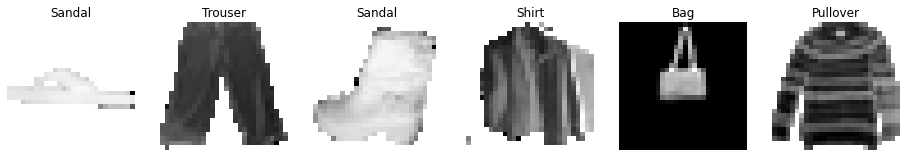

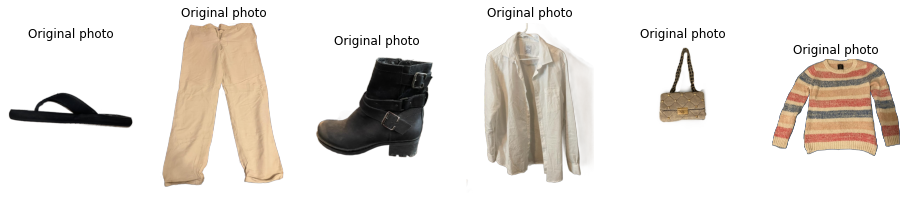

In [23]:
#import python modules 
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
from skimage import color
from skimage import io
import os

path = "pics"#define the path of folder containing photos
pic_list=os.listdir(path)#assign the object(photos) names to a list
fig, ax = plt.subplots(1,len(pic_list), figsize=(16,16))#assign subplot array
j=0
for i in pic_list:#iterate over the object list 
    img = Image.open('pics/'+i)#open image 
    cnv = img.resize((28,28))#resize the image
    cnv = cnv.convert("L")#grayscale the image
    arr = np.array(cnv)#assign it to an numpy array

    target =arr.reshape(1,784)#reshape the array to an one dimensional array
    predicted=NN_model.predict(target)#predict with Neural network model
    name = class_names[predicted[0]]#get the name name of predicted value from class name list
    ax[j].imshow(arr, cmap='binary')#visualize the image in binary
    ax[j].set_title(name)#show the class name as title of image
    ax[j].axis('off')
    ax[j].set(xticks=[], yticks=[])
    j+=1
    pic_list=os.listdir(path)
fig, ax = plt.subplots(1,len(pic_list), figsize=(16,16))
j=0
#to see the actual image
for i in pic_list:#iterate over the list
    img = Image.open('pics/'+i)#open image
    cnv = img.resize((28,28))
    arr = np.array(cnv)
    ax[j].imshow(img)#visualize the image
    ax[j].set_title('Original photo')
    ax[j].axis('off')
    ax[j].set(xticks=[], yticks=[])
    j+=1

<ul><li>The Neural network model can identify five photos accurately out of six photos. But a lot of parameters had to be adjusted to make the photos identifiable to the model. We had to remove the background from the photos. A liitle distortion in shape makes the model to do a wrong prediction.As the original training dataset was highly distorted and pixalated images, it can only identify those kind of images better. </li>
    <li>But with a correct angle of photography, and a little editing(removal of backgrounds) the model is being able to identify images correctly.</li>
    <li>It also have an issue of having objects with relatively similar shapes, like shirt and coat have quite similar in shape, ankle boot and woman's sandal have a similar kind of shape. Pullover and T shirs are also sometimes identical.</li>
    <li>Thereby we can infer that the model can be used for identifying real photos in a limited capacity, and it may even fail to score better than a human child. </li>
    <li>The model might perform better in real world scenarios if we train it with less distorted photographs with photos taken from various different angles.</li>

<ul>

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final work should be very well structured and should have a consistent flow of analysis.</li>
</ul>

#### Due Date: Nov 1 2022 at 7:00 PM

## Grading Criteria

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>25%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>25%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>25%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>25%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Innovation (Extra)</th>
        <td style="text-align:center;border:1px black solid"><b>10%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">110%</b></td>
    </tr>
</table>